<a href="https://colab.research.google.com/github/KillShotAK/UoS-Forex-Trading-Robot/blob/main/PreprocessSTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np

# Load the data
file_path = '/content/EURUSD_prices_Hourly.xlsx'
data = pd.read_excel(file_path)

# Calculate log returns of the closing prices
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

# Define the labeling function based on standard deviation
def label_std_dev(log_returns, window=20, multiplier=0.25):
    rolling_std = log_returns.rolling(window=window).std()
    threshold = multiplier * rolling_std
    return np.where(log_returns > threshold, "up",
                    np.where(log_returns < -threshold, "down", "hold"))

# Label the data
data['Label'] = label_std_dev(data['log_return'])

# Drop the log returns column
data.drop(columns=['log_return'], inplace=True)

# Feature scaling using Z-Scale on the raw prices and other features
features = ['Close', 'Open', 'Low', 'High', 'Volume', 'stochastic', 'momentum', 'wiliams',
            'ADI', 'EMA', 'MACD', 'RSI', 'on_balance_volume', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'ATR']
data[features] = (data[features] - data[features].mean()) / data[features].std()

# Label mapping
label_mapping = {'up': 2, 'hold': 1, 'down': 0}
data['Label'] = data['Label'].replace(label_mapping)

# Count of labels
label_counts = data['Label'].value_counts()

# Display the counts
print("Counts of labels:\n", label_counts)

# Save the processed data to a new file
processed_file_path = '/content/Processed_EURUSD_prices_Hourly.xlsx'
data.to_excel(processed_file_path, index=False)

print(f"Processed data saved to: {processed_file_path}")


Counts of labels:
 Label
2    6076
0    5901
1    4241
Name: count, dtype: int64
Processed data saved to: /content/Processed_EURUSD_prices_Hourly.xlsx


In [ ]:
print(data.head())

      Close      Open       Low      High    Volume              Date  \
0  0.828998  0.817972  0.814812  0.816385  0.909846  2018-09-24T06:00   
1  0.833855  0.828454  0.841671  0.844231  1.526717  2018-09-24T07:00   
2  0.908751  0.834334  0.849089  0.894047  1.865108  2018-09-24T08:00   
3  0.913864  0.908728  0.915341  0.908097  0.705746  2018-09-24T09:00   
4  0.899549  0.914352  0.914062  0.910652  0.703461  2018-09-24T10:00   

   stochastic  momentum   wiliams       ADI       EMA      MACD       RSI  \
0   -0.375540 -0.823231 -0.375540  2.309650  0.849296 -0.793577 -0.908798   
1   -0.169445 -0.773092 -0.169445  2.271729  0.847423 -0.767831 -0.768887   
2    1.619651 -0.648379  1.619651  2.355578  0.855798 -0.516047  0.768729   
3    1.389359 -0.435391  1.389359  2.364515  0.863739 -0.297806  0.843935   
4    0.954050 -0.203831  0.954050  2.321411  0.868711 -0.166173  0.528502   

   on_balance_volume    bb_bbm    bb_bbh    bb_bbl       ATR  Label  
0           2.445373  0.8531

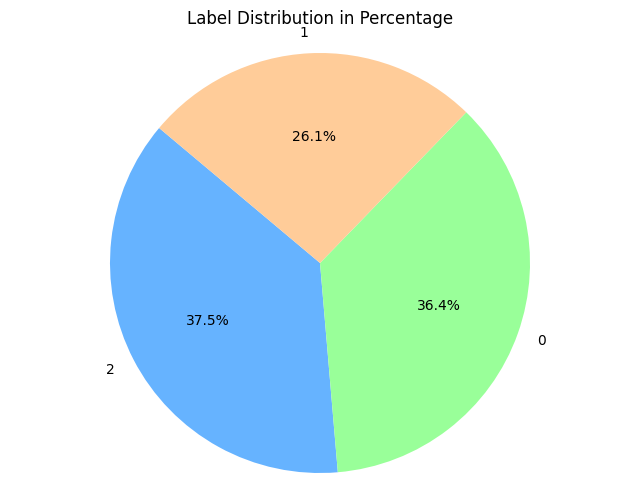

In [ ]:
import matplotlib.pyplot as plt
# Calculate the percentage of each label
label_percentage = data['Label'].value_counts(normalize=True) * 100

# Plot the label distribution as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(label_percentage, labels=label_percentage.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Label Distribution in Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [ ]:
# Save the processed data to a pickle file
processed_pkl_path = '/content/Processed_EURUSD_prices_Hourly.pkl'
data.to_pickle(processed_pkl_path)

print(f"Processed data saved to: {processed_pkl_path}")

Processed data saved to: /content/Processed_EURUSD_prices_Hourly.pkl


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Ensure the DataFrame is sorted by date
data = data.sort_values(by='Date')

# List of columns to keep (excluding non-technical indicator columns as per your description)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'stochastic', 'momentum', 'wiliams', 'ADI', 'EMA', 'MACD', 'RSI', 'ATR', 'on_balance_volume', 'bb_bbm', 'bb_bbh', 'bb_bbl']

# Splitting into features (X) and labels (y)
X = data[features]
y = data['Label']

# First split: 70% training, 30% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Second split: Split the temp set into validation and test (each 10% of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

# Save the split data to separate pickle files
X_train.to_pickle('/content/x_train_EURUSD_price.pkl')
y_train.to_pickle('/content/y_train_EURUSD_price.pkl')
X_val.to_pickle('/content/x_val_EURUSD_price.pkl')
y_val.to_pickle('/content/y_val_EURUSD_price.pkl')
X_test.to_pickle('/content/x_test_EURUSD_price.pkl')
y_test.to_pickle('/content/y_test_EURUSD_price.pkl')

# Display the paths to confirm
split_paths = {
    'X_train': '/content/x_train_EURUSD_price.pkl',
    'y_train': '/content/y_train_EURUSD_price.pkl',
    'X_val': '/content/x_val_EURUSD_price.pkl',
    'y_val': '/content/y_val_EURUSD_price.pkl',
    'X_test': '/content/x_test_EURUSD_price.pkl',
    'y_test': '/content/y_test_EURUSD_price.pkl'
}

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")
print("Processed data saved to the following paths:")
for key, path in split_paths.items():
    print(f"{key}: {path}")

# Verify the percentages
total = len(X)
print(f"\nPercentages:")
print(f"Training: {len(X_train)/total*100:.1f}%")
print(f"Validation: {len(X_val)/total*100:.1f}%")
print(f"Testing: {len(X_test)/total*100:.1f}%")

Training set size: 11352
Validation set size: 2433
Testing set size: 2433
Processed data saved to the following paths:
X_train: /content/x_train_EURUSD_price.pkl
y_train: /content/y_train_EURUSD_price.pkl
X_val: /content/x_val_EURUSD_price.pkl
y_val: /content/y_val_EURUSD_price.pkl
X_test: /content/x_test_EURUSD_price.pkl
y_test: /content/y_test_EURUSD_price.pkl

Percentages:
Training: 70.0%
Validation: 15.0%
Testing: 15.0%


In [ ]:
print(X_train.head())

       Open      High       Low     Close    Volume  stochastic  momentum  \
0  0.817972  0.816385  0.814812  0.828998  0.909846   -0.375540 -0.823231   
1  0.828454  0.844231  0.841671  0.833855  1.526717   -0.169445 -0.773092   
2  0.834334  0.894047  0.849089  0.908751  1.865108    1.619651 -0.648379   
3  0.908728  0.908097  0.915341  0.913864  0.705746    1.389359 -0.435391   
4  0.914352  0.910652  0.914062  0.899549  0.703461    0.954050 -0.203831   

    wiliams       ADI       EMA      MACD       RSI       ATR  \
0 -0.375540  2.309650  0.849296 -0.793577 -0.908798 -0.366554   
1 -0.169445  2.271729  0.847423 -0.767831 -0.768887 -0.322339   
2  1.619651  2.355578  0.855798 -0.516047  0.768729 -0.067037   
3  1.389359  2.364515  0.863739 -0.297806  0.843935 -0.093260   
4  0.954050  2.321411  0.868711 -0.166173  0.528502 -0.098250   

   on_balance_volume    bb_bbm    bb_bbh    bb_bbl  
0           2.445373  0.853183  0.812105  0.892657  
1           2.523791  0.850508  0.806239

In [ ]:
print(y_train.head())

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64
